In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

from fullly_connected_nn import NN


In [2]:
ds = pd.read_csv('./bank-churn.csv')

In [3]:
num1 = ds[ds['Exited']==1].__len__()
num0 = num1

In [6]:
ds = pd.concat([ds[ds['Exited']==1][:num1], ds[ds['Exited']==0][:num0]], axis=0)

In [8]:
ds = ds.sample(frac=1)

In [9]:
x = ds[['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = ds['Exited']

In [10]:
m = len(x)
tr_cv = round(0.8 * m)  # border between train and dev datasets
cv_test = round(0.9 * m) # border between dev and test datasets

X_train, X_cv, X_test = x[:tr_cv], x[tr_cv:cv_test], x[cv_test:]
y_train, y_cv, y_test = y[:tr_cv], y[tr_cv:cv_test], y[cv_test:]


In [11]:
def z_standartization(df, columns):
  mean_dict = {}
  sd_dict = {}
  new_df = df.copy()
  for col in columns:
    c = np.array(new_df[col])
    mean = c.mean()
    sd = np.sqrt(sum((c - mean)**2) / len(c))
    new_df[col] = (c - mean) / sd

    mean_dict[col] = mean
    sd_dict[col] = sd
  return new_df, mean_dict, sd_dict

In [13]:
scaled_X_train, mean_X_train, sd_X_train = z_standartization(X_train, ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])

In [14]:
pd.DataFrame(scaled_X_train)

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
18067,-2.592197,0.715787,-0.976117,-0.785594,1,0,0.507720
35870,-1.274101,0.361491,-0.976117,0.865597,0,0,1.223303
25565,1.509916,0.361491,-0.976117,0.865597,1,0,0.472907
45082,0.228776,0.361491,-0.976117,-0.785594,1,0,0.331347
13001,-2.185682,1.070082,-0.976117,0.865597,0,1,-0.439062
...,...,...,...,...,...,...,...
25198,0.253413,-1.055690,-0.976117,0.865597,1,1,0.672815
32851,-0.214696,-1.055690,-0.976117,-0.785594,1,0,1.022467
25595,-0.091509,1.070082,0.877707,-0.785594,1,1,0.506871
7864,-0.534981,-1.409986,0.439935,-0.785594,1,0,-2.176717


In [15]:
scaled_X_train = np.array(scaled_X_train, dtype=np.float64).T

In [16]:
X_train, X_cv, X_test = np.array(X_train).T, np.array(X_cv).T, np.array(X_test).T
y_train, y_cv, y_test = np.array(y_train).reshape(1, -1), np.array(y_cv).reshape(1, -1), np.array(y_test).reshape(1, -1)

In [141]:
model_1 = NN([7, 10, 1], W_init_scale=1)

In [234]:
J_history = model_1.backward(scaled_X_train, y_train, l_rate=0.5, epochs=100)

----------------------------------
Changes in epoch 1:
J: [[0.52247744]] => [[0.52251423]]
MAE: [[0.3476293]] => [[0.34764732]]
Accuracy: 43681/59131 (73.87%) => 43674/59131 (73.86%)
----------------------------------
Changes in epoch 2:
J: [[0.52251423]] => [[0.52250228]]
MAE: [[0.34764732]] => [[0.34764711]]
Accuracy: 43674/59131 (73.86%) => 43671/59131 (73.85%)
----------------------------------
Changes in epoch 3:
J: [[0.52250228]] => [[0.52251716]]
MAE: [[0.34764711]] => [[0.34764718]]
Accuracy: 43671/59131 (73.85%) => 43674/59131 (73.86%)
----------------------------------
Changes in epoch 4:
J: [[0.52251716]] => [[0.52251741]]
MAE: [[0.34764718]] => [[0.34764601]]
Accuracy: 43674/59131 (73.86%) => 43674/59131 (73.86%)
----------------------------------
Changes in epoch 5:
J: [[0.52251741]] => [[0.52248179]]
MAE: [[0.34764601]] => [[0.34763163]]
Accuracy: 43674/59131 (73.86%) => 43675/59131 (73.86%)
----------------------------------
Changes in epoch 6:
J: [[0.52248179]] => [[0.5

Text(0, 0.5, 'J value')

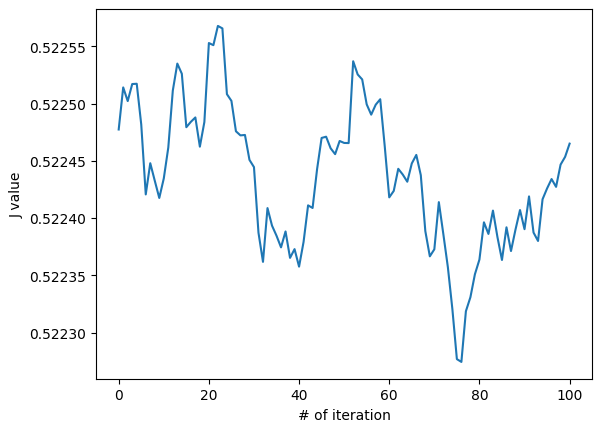

In [235]:
J_hist = [arr[0][0] for arr in J_history]

plt.plot(J_hist)
plt.xlabel('# of iteration')
plt.ylabel('J value')

In [17]:
scaled_X_cv, X_cv_mean, X_cv_sd = z_standartization(X_cv, [0, 1, 2, 3, 6])
model_1_cv_out = model_1.forward(scaled_X_cv)
model_1.accuracy(model_1_cv_out, y_cv)

In [ ]:
model_1.accuracy(model_1_cv_out, y_cv)

In [215]:
model_1.MAE(model_1_cv_out, y_cv)

array([[0.35133688]])

In [23]:
y_train.shape

(1, 59131)

(array([29601.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 29530.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

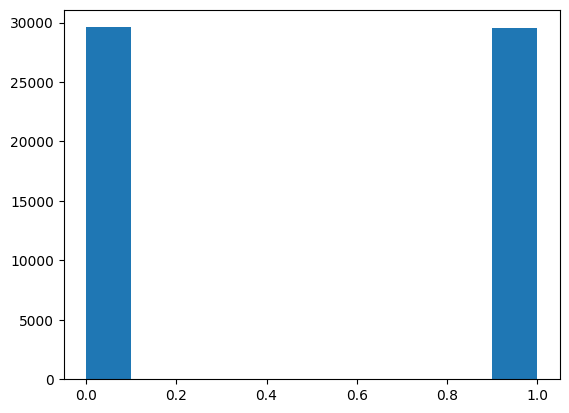

In [24]:
plt.hist(y_train.T)

In [25]:
model_2_L2 = NN_L2([7, 10, 10, 1], W_init_scale=1)
J_m2_history = []
J_m2_cv_history = []

In [443]:
epochs = 100

In [444]:
J_m2_h, J_m2_cv_h = model_2_L2.backward(scaled_X_train, y_train, l_rate=0.01, epochs=epochs, keep_prob=1, X_cv=scaled_X_cv, Y_cv=y_cv)
J_m2_history += J_m2_h
J_m2_cv_history += J_m2_cv_h

----------------------------------
Changes in epoch 1:
J: [[0.53074008]] => [[0.53073768]]
MAE: [[0.35542612]] => [[0.3554241]]
Accuracy: 43365/59131 (73.34%) => 43365/59131 (73.34%)
J_cv: [[0.55130195]] => [[0.55130223]]
MAE_cv: [[0.37127445]] => [[0.37127335]]
Accuracy_cv: 5322/7392 (72.0%) => 5322/7392 (72.0%)
----------------------------------
Changes in epoch 2:
J: [[0.53073768]] => [[0.53073529]]
MAE: [[0.3554241]] => [[0.35542208]]
Accuracy: 43365/59131 (73.34%) => 43363/59131 (73.33%)
J_cv: [[0.55130223]] => [[0.55130251]]
MAE_cv: [[0.37127335]] => [[0.37127225]]
Accuracy_cv: 5322/7392 (72.0%) => 5322/7392 (72.0%)
----------------------------------
Changes in epoch 3:
J: [[0.53073529]] => [[0.5307329]]
MAE: [[0.35542208]] => [[0.35542006]]
Accuracy: 43363/59131 (73.33%) => 43363/59131 (73.33%)
J_cv: [[0.55130251]] => [[0.55130278]]
MAE_cv: [[0.37127225]] => [[0.37127115]]
Accuracy_cv: 5322/7392 (72.0%) => 5322/7392 (72.0%)
----------------------------------
Changes in epoch 4:


later add save to json and load from json functions to the model class

In [435]:
len(J_m2_history), len(J_m2_cv_history)

(9855, 9855)

Text(0, 0.5, 'J value')

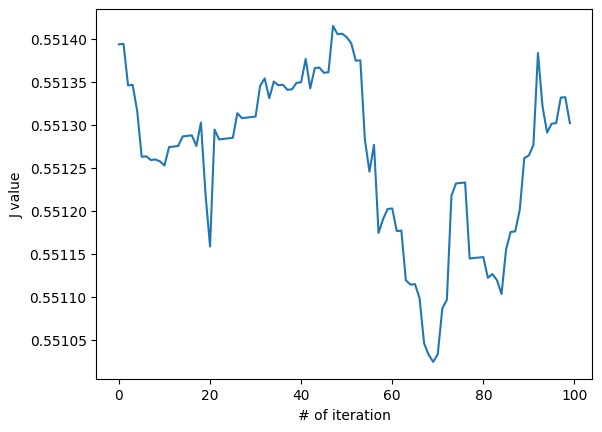

In [436]:
J_m2_hist = [arr[0][0] for arr in J_m2_history]
J_m2_cv_hist = [arr[0][0] for arr in J_m2_cv_history]
# plt.plot(J_m2_hist[-epochs:])
plt.plot(J_m2_cv_hist[-epochs:])
plt.xlabel('# of iteration')
plt.ylabel('J value')

model_2_L2.b_t[1][0][0] ==== 0.30488866539254345

In [488]:
model_2_L2.b_t[1][0][0]

0.30488866539254345

In [483]:
model_2_L2.b_t[1][0][0]

0.30488866539254345